# PixMeshes



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import imread
from quagmire import tools as meshtools
%matplotlib inline

## PixMesh



In [2]:
from quagmire import FlatMesh 
from quagmire import TopoMesh # all routines we need are within this class
from quagmire import SurfaceProcessMesh

meshX = 1000
meshY = 1000

DM = meshtools.create_DMDA(-5.0, 5.0, -5.0, 5.0, meshX, meshY )


In [3]:
mesh = SurfaceProcessMesh(DM)  ## cloud array etc can surely be done better ... 
mesh_noise = SurfaceProcessMesh(DM)

RBF matrix assembly - 2.06558s
RBF matrix assembly - 1.999127s


In [9]:
x = mesh.coords[:,0]
y = mesh.coords[:,1]

radius  = np.sqrt((x**2 + y**2))
theta   = np.arctan2(y,x)

height  = np.exp(-0.025*(x**2 + y**2)**2) + 0.25 * (0.2*radius)**4  * np.cos(10.0*theta)**2 ## Less so
height  += 0.5 * (1.0-0.2*radius)
height_noise = height + np.random.random(height.size) * 0.001 # random noise

# height[np.where( radius > 5.0)] = 0.0 
# height_noise[np.where( radius> 5.0)] = 0.0 

rainfall = np.ones_like(height)
rainfall[np.where( radius > 5.0)] = 0.0 

mesh.downhill_neighbours = 2
mesh_noise.downhill_neighbours = 2

mesh.update_height(height)
mesh_noise.update_height(height_noise)


In [10]:
mo1 = mesh.identify_outflow_points()
i = np.argsort(theta[mo1])
outflows = mo1[i]

mo1n = mesh_noise.identify_outflow_points()
i = np.argsort(theta[mo1n])
outflows_noise = mo1n[i]

In [14]:
mesh.downhill_neighbours = 2
mesh_noise.downhill_neighbours = 2
mesh.update_height(height)
mesh_noise.update_height(height_noise)

flowpaths = mesh.cumulative_flow(rainfall*mesh.area)
logpaths = np.log10(flowpaths)
sqrtpaths = np.sqrt(flowpaths)

flowpaths_noise = mesh_noise.cumulative_flow(rainfall*mesh.area)
logpaths_noise = np.log10(flowpaths_noise)
sqrtpaths_noise = np.sqrt(flowpaths_noise)

mesh.downhill_neighbours = 3
mesh_noise.downhill_neighbours = 3
mesh.update_height(height)
mesh_noise.update_height(height_noise)

flowpaths3 = mesh.cumulative_flow(rainfall*mesh.area)
logpaths3 = np.log10(flowpaths3)
sqrtpaths3 = np.sqrt(flowpaths3)

flowpaths_noise3 = mesh_noise.cumulative_flow(rainfall*mesh.area)
logpaths_noise3 = np.log10(flowpaths_noise3)
sqrtpaths_noise3 = np.sqrt(flowpaths_noise3)

mesh.downhill_neighbours = 1
mesh_noise.downhill_neighbours = 1
mesh.update_height(height)
mesh_noise.update_height(height_noise)

flowpaths1 = mesh.cumulative_flow(rainfall*mesh.area)
logpaths1 = np.log10(flowpaths1)
sqrtpaths1 = np.sqrt(flowpaths1)

flowpaths_noise1 = mesh_noise.cumulative_flow(rainfall*mesh.area)
logpaths_noise1 = np.log10(flowpaths_noise1)
sqrtpaths_noise1 = np.sqrt(flowpaths_noise1)



/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in log10


In [15]:
## What's happening with the outflow points - how to find them ? 
"""
circum_points = np.where( np.abs(radius-4.9) <= 0.001 )[0]
circum_angle = theta[circum_points]

circum_flow_1 = flowpaths1[circum_points]
circum_flow_2 = flowpaths[circum_points]
circum_flow_3 = flowpaths3[circum_points]

circum_flow_1n = flowpaths_noise1[circum_points]
circum_flow_2n = flowpaths_noise[circum_points]
circum_flow_3n = flowpaths_noise3[circum_points]
"""
pass

In [16]:
# Choose a scale to plot all six flow results
fmax = 1.0

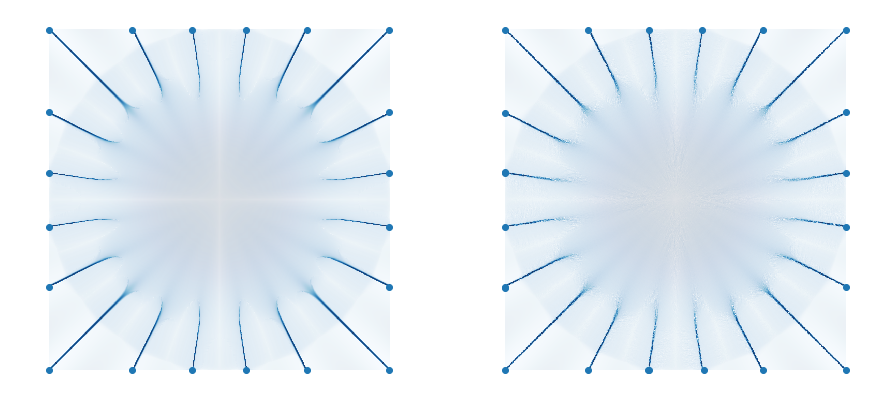

In [17]:
fig = plt.figure(1, figsize=(15,7.5))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax.axis('off')
ax2.axis('off')

im = ax.imshow(sqrtpaths.reshape((meshX,meshY)),   extent=[-5.0,5.0,-5.0,5.0], 
               cmap='Blues', origin='upper', alpha=1.0, vmax=fmax)
im2  = ax.imshow(mesh.height.reshape((meshX,meshY)), extent=[-5.0,5.0,-5.0,5.0], 
                 cmap=plt.cm.bone_r, origin='upper', alpha=0.1)

im3 = ax2.imshow(sqrtpaths_noise.reshape((meshX,meshY)),  extent=[-5.0,5.0,-5.0,5.0], 
                 cmap='Blues', origin='upper', alpha=1.0, vmax=fmax)
im4  = ax2.imshow(mesh.height.reshape((meshX,meshY)), extent=[-5.0,5.0,-5.0,5.0], 
                  cmap=plt.cm.bone_r, origin='upper', alpha=0.1)

ax.scatter(mesh.coords[outflows, 0], mesh.coords[outflows, 1])
ax2.scatter(mesh.coords[outflows_noise, 0], mesh.coords[outflows_noise, 1])

# fig.savefig("PixMesh_FlowPaths_N2.png", dpi=300)

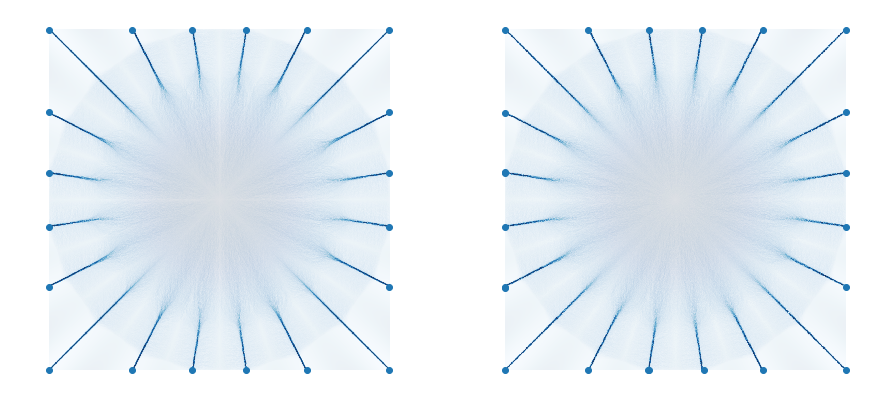

In [18]:
fig = plt.figure(1, figsize=(15,7.5))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax.axis('off')
ax2.axis('off')

im = ax.imshow(sqrtpaths3.reshape((meshX,meshY)), extent=[-5.0,5.0,-5.0,5.0], 
               cmap='Blues', origin='upper', alpha=1.0, vmax=fmax)
im2  = ax.imshow(mesh.height.reshape((meshX,meshY)), extent=[-5.0,5.0,-5.0,5.0],
                 cmap=plt.cm.bone_r, origin='upper', alpha=0.1)

im3 = ax2.imshow(sqrtpaths_noise3.reshape((meshX,meshY)), extent=[-5.0,5.0,-5.0,5.0], 
                 cmap='Blues', origin='upper', alpha=1.0, vmax=fmax)
im4  = ax2.imshow(mesh.height.reshape((meshX,meshY)), extent=[-5.0,5.0,-5.0,5.0], 
                  cmap=plt.cm.bone_r, origin='upper', alpha=0.1)

ax.scatter(mesh.coords[outflows, 0], mesh.coords[outflows, 1])
ax2.scatter(mesh.coords[outflows_noise, 0], mesh.coords[outflows_noise, 1])


# fig.savefig("PixMesh_FlowPaths_N3.png", dpi=300)

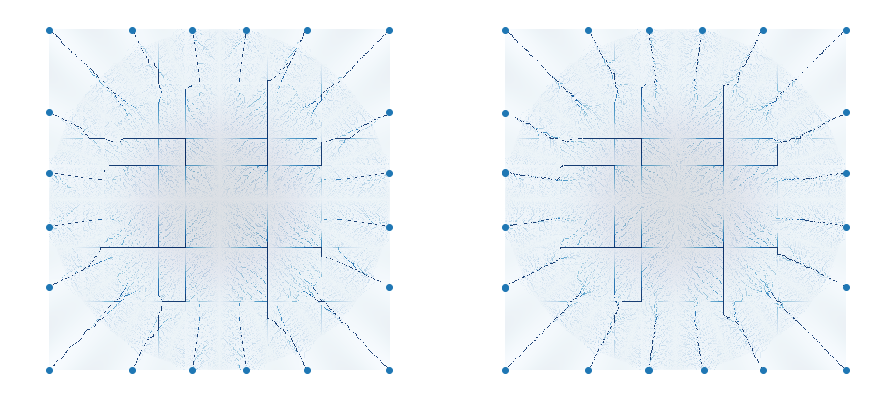

In [19]:
fig = plt.figure(1, figsize=(15,7.5))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax.axis('off')
ax2.axis('off')

im = ax.imshow(sqrtpaths1.reshape((meshX,meshY)),   extent=[-5.0,5.0,-5.0,5.0], 
               cmap='Blues', origin='upper', alpha=1.0, vmax=fmax)
im2  = ax.imshow(mesh.height.reshape((meshX,meshY)), extent=[-5.0,5.0,-5.0,5.0], 
                 cmap=plt.cm.bone_r, origin='upper', alpha=0.1)

im3 = ax2.imshow(sqrtpaths_noise1.reshape((meshX,meshY)),  extent=[-5.0,5.0,-5.0,5.0], 
                 cmap='Blues', origin='upper', alpha=1.0, vmax=fmax)
im4  = ax2.imshow(mesh.height.reshape((meshX,meshY)), extent=[-5.0,5.0,-5.0,5.0], 
                  cmap=plt.cm.bone_r, origin='upper', alpha=0.1)

ax.scatter(mesh.coords[outflows, 0], mesh.coords[outflows, 1])
ax2.scatter(mesh.coords[outflows_noise, 0], mesh.coords[outflows_noise, 1])

# fig.savefig("PixMesh_FlowPaths_N1.png", dpi=300)

In [20]:
# The following may not matter but noise can break up the outflows

theta_vals = np.radians(np.linspace(-180,180,21))
outflow_bins = np.digitize(theta[outflows_noise], theta_vals)
theta_bins = theta_vals[1:] - np.pi / 20

raw_flowsN1 = flowpaths_noise1[outflows_noise]
raw_flowsN2 = flowpaths_noise[outflows_noise]
raw_flowsN3 = flowpaths_noise3[outflows_noise]

bin_flowsN1 = np.zeros(20)
bin_flowsN2 = np.zeros(20)
bin_flowsN3 = np.zeros(20)

for i in range(0,len(outflows_noise)):
    bin_flowsN1[outflow_bins[i]-1] += raw_flowsN1[i]
    bin_flowsN2[outflow_bins[i]-1] += raw_flowsN2[i]
    bin_flowsN3[outflow_bins[i]-1] += raw_flowsN1[i]


# print bin_flowsN1, bin_flowsN1.sum()
# print bin_flowsN2, bin_flowsN2.sum()
# print bin_flowsN3, bin_flowsN3.sum()



<Container object of 20 artists>

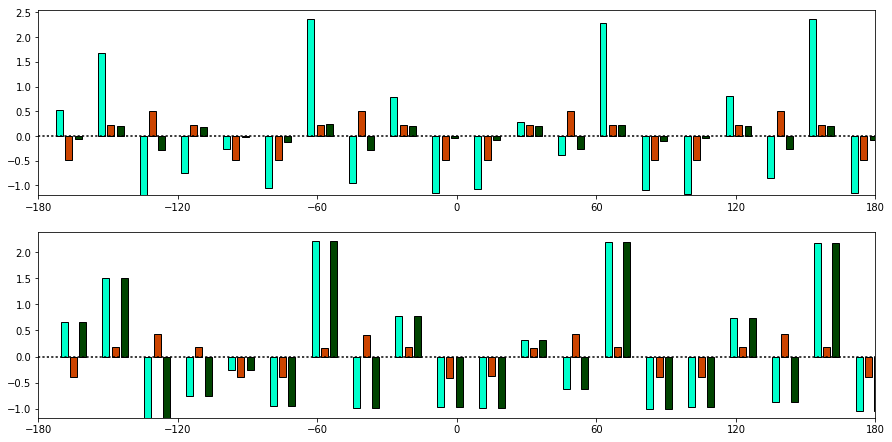

In [21]:

fig = plt.figure(1, figsize=(15,7.5))
ax = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

reference = 25 *np.pi / 20.0 

ax.set_xlim(-180,180)
ax.set_xticks(np.arange(-180,200,60))
ax2.set_xlim(-180,180)
ax2.set_xticks(np.arange(-180,200,60))

ax.axhline(y=0.0, linestyle=':', color="Black")
ax2.axhline(y=0.0, linestyle=':', color="Black")


#ax.set_ylim(0.0, 100.0)

ax.bar( np.degrees(theta[outflows])+0.0, (flowpaths1[outflows]-reference),  linewidth=1, edgecolor="Black",
                                            width=3, color="#00FFCC")

ax.bar( np.degrees(theta[outflows])+4.0,     (flowpaths[outflows]-reference), linewidth=1, edgecolor="Black",
                                           width=3, color="#CC4400")

ax.bar( np.degrees(theta[outflows])+8.0, (flowpaths3[outflows]-reference),  linewidth=1, edgecolor="Black",
                                           width=3, color="#004400")



ax2.bar( np.degrees(theta_bins)+2.0, (bin_flowsN1-reference),  linewidth=1, edgecolor="Black",
                                            width=3, color="#00FFCC")

ax2.bar( np.degrees(theta_bins)+6.0, (bin_flowsN2-reference),  linewidth=1, edgecolor="Black", 
                                           width=3, color="#CC4400")


ax2.bar( np.degrees(theta_bins)+10.0, (bin_flowsN3-reference),  linewidth=1, edgecolor="Black",
                                           width=3, color="#004400")




# ax.bar( np.arange(0,20),  flowpaths[outflows], width = 0.05)
# ax.bar( 0.2 + np.arange(0,20),  flowpaths_noise[outflows_noise] , width = 0.05 )

# ax.bar( 0.4 + np.arange(0,20),  flowpaths1[outflows], width = 0.05)
# ax.bar( 0.6 + np.arange(0,20),  flowpaths_noise1[outflows_noise] , width = 0.05 )



In [103]:
def cumulative_flow_smoothed(vector):

    self = mesh

    downhillMat = mesh.downhillMat

    self.lvec.setArray(vector)
    self.dm.localToGlobal(self.lvec, self.gvec)

    DX0 = self.gvec.copy()
    DX1 = self.gvec.copy()
    DX1s = self.gvec.copy()

    DX1_sum = DX1.sum()

    niter = 0
    equal = False

    tolerance = 1.0e-8 * DX1_sum

    while not equal:

        DX1_isum = DX1_sum
        DX1 = downhillMat * DX1
        DX1_sum = DX1.sum()
        DX0 += mesh.rbfMat * DX1

        equal = (DX1_sum < tolerance)
        niter += 1

    self.dm.globalToLocal(DX0, self.lvec)

    return self.lvec.array.copy()



In [125]:
mesh.downhill_neighbours=3
mesh.update_height(mesh.height)

In [126]:
cum1 = mesh.cumulative_flow(rainfall*mesh.area)


In [127]:
cum2 = cumulative_flow_smoothed(rainfall*mesh.area)

In [128]:

cum3 = mesh.rbf_smoother(cum1)

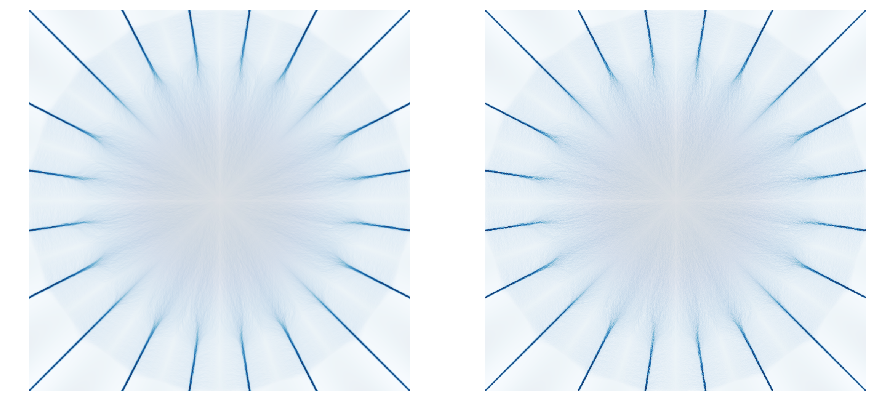

In [129]:
fmax = 1.0
fig = plt.figure(1, figsize=(15,7.5))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax.axis('off')
ax2.axis('off')

im = ax.imshow(np.sqrt(cum3).reshape((meshX,meshY)),   extent=[-5.0,5.0,-5.0,5.0], 
               cmap='Blues', origin='upper', alpha=1.0, vmax=fmax)
im2  = ax.imshow(mesh.height.reshape((meshX,meshY)), extent=[-5.0,5.0,-5.0,5.0], 
                 cmap=plt.cm.bone_r, origin='upper', alpha=0.1)

im3 = ax2.imshow(np.sqrt(cum1).reshape((meshX,meshY)),  extent=[-5.0,5.0,-5.0,5.0], 
                 cmap='Blues', origin='upper', alpha=1.0, vmax=fmax)
im4  = ax2.imshow(mesh.height.reshape((meshX,meshY)), extent=[-5.0,5.0,-5.0,5.0], 
                  cmap=plt.cm.bone_r, origin='upper', alpha=0.1)

# ax.scatter(mesh.coords[outflows, 0], mesh.coords[outflows, 1])
# ax2.scatter(mesh.coords[outflows_noise, 0], mesh.coords[outflows_noise, 1])

# fig.savefig("PixMesh_FlowPaths_N2_Averages.png", dpi=300)

In [119]:
cum1.max()

6.293881469056636

In [120]:
cum2.max()

4.4928919881932083

In [121]:
cum2.sum()

26682.786247194254

In [122]:
cum1.sum()

26688.023959895821

In [54]:
np.log(cum1).max()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


1.8395779660938378

In [114]:
cum1[~mesh.bmask].sum()

213.50239128016915

In [115]:
cum2[~mesh.bmask].sum()

191.26424751273663

In [56]:
mat = mesh.lvec.copy()
mat.setArray(cum1)

mesh.rbfMat * mat
mat.array.sum()

26688.023959895821

In [46]:
mat.array[outflows].sum()

78.533388243097932